<a href="https://colab.research.google.com/github/anibahs/TravelBookings_DataAnalysis/blob/main/Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd;
from matplotlib import pyplot as plt
import numpy as np;
%matplotlib inline

In [ ]:
df = pd.read_excel("/content/Dataset.xlsx",names=["week","mobile_indicator_name","platform_type_name","super_region",
                  "country_name","booking_window_group", "property_country","net_gross_booking_value_usd","net_orders"])

In [ ]:
df.info()
df['super_region'].fillna("America", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73688 entries, 0 to 73687
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   week                         73688 non-null  object 
 1   mobile_indicator_name        73688 non-null  object 
 2   platform_type_name           73688 non-null  object 
 3   super_region                 53423 non-null  object 
 4   country_name                 73688 non-null  object 
 5   booking_window_group         73688 non-null  object 
 6   property_country             73688 non-null  object 
 7   net_gross_booking_value_usd  73688 non-null  float64
 8   net_orders                   73688 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73688 entries, 0 to 73687
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------               

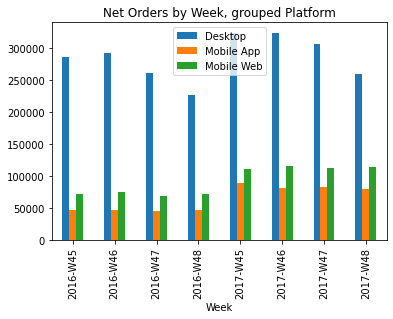

In [ ]:
entries_by_platform=df.groupby(["week","platform_type_name"],as_index=False).agg(orders = ('net_orders', 'sum'))

gross_value_by_week = []

for i in range(2,len(entries_by_platform),3):
    gross_value_by_week.append([entries_by_platform.loc[i-2, "week"],entries_by_platform.loc[i-2, 
              "orders"],entries_by_platform.loc[i-1, "orders"],entries_by_platform.loc[i, "orders"]])
    
    
df1=pd.DataFrame(gross_value_by_week, columns=['Week', 'Desktop', 'Mobile App', 'Mobile Web'])
df1.plot(x='Week',
        kind='bar',
        stacked=False,
        title='Net Orders by Week, grouped Platform')

       Week    APAC  America    EMEA   LATAM
0  2016-W45  286353    46740   71292  291942
1  2016-W46   46593    74788  260941   44696
2  2016-W47   68053   226949   45969   71981
3  2017-W45  323733    89044  111251  322527
4  2017-W46   81283   115847  305797   83028
5  2017-W47  112503   259217   79186  113966


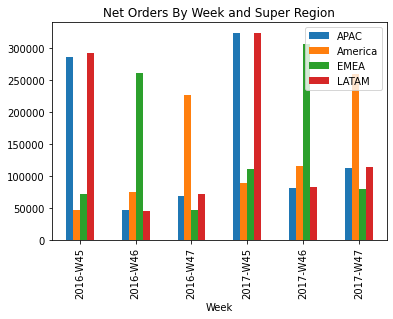

In [ ]:
entries_by_week=df.groupby(["week","super_region"],as_index=False).agg(orders = ('net_orders', 'sum'))

gross_value_by_week = []

for i in range(3,len(entries_by_platform),4):
    gross_value_by_week.append([entries_by_platform.loc[i-3, "week"],entries_by_platform.loc[i-3, 
              "orders"],entries_by_platform.loc[i-2, "orders"],entries_by_platform.loc[i-1, "orders"],entries_by_platform.loc[i, "orders"]])


df1=pd.DataFrame(gross_value_by_week, columns=['Week','APAC','America', 'EMEA', 'LATAM'])
print(df1)
df1.plot(x='Week',
        kind='bar',
        stacked=False,
        title='Net Orders By Week and Super Region')

   super_region platform_type_name   gross_value
0          APAC            Desktop  6.911254e+07
1          APAC         Mobile App  3.294577e+07
2          APAC         Mobile Web  1.266633e+07
3       America            Desktop  4.690309e+08
4       America         Mobile App  7.146789e+07
5       America         Mobile Web  1.115568e+08
6          EMEA            Desktop  1.046738e+08
7          EMEA         Mobile App  1.097155e+07
8          EMEA         Mobile Web  2.380840e+07
9         LATAM            Desktop  2.652887e+07
10        LATAM         Mobile App  2.224027e+06
11        LATAM         Mobile Web  4.065610e+06


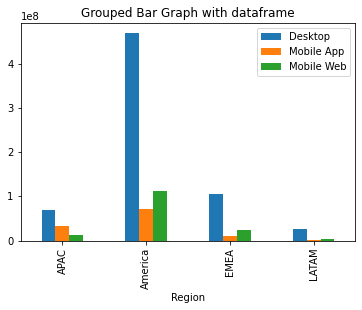

In [ ]:
entries_by_platform=df.groupby(["super_region","platform_type_name"],as_index=False).agg(gross_value = ('net_gross_booking_value_usd', 'sum'))

gross_value_by_region = []

for i in range(2,len(entries_by_platform),3):
    gross_value_by_region.append([entries_by_platform.loc[i-2, "super_region"],entries_by_platform.loc[i-2, 
              "gross_value"],entries_by_platform.loc[i-1, "gross_value"],entries_by_platform.loc[i, "gross_value"]])
    
    
df1=pd.DataFrame(gross_value_by_region, columns=['Region', 'Desktop', 'Mobile App', 'Mobile Web'])
print(entries_by_platform)
df1.plot(x='Region',
        kind='bar',
        stacked=False,
        title='Net Gross Booking Value USD by Region and Platform')
 

   booking_window_group    country_name  orders
0              +90 days       Australia    9806
1              +90 days          Brazil    7355
2              +90 days       Hong Kong    7432
3              +90 days          Norway   10434
4              +90 days     South Korea    6104
..                  ...             ...     ...
63            Post Book       Australia       1
64            Post Book          Norway       2
65            Post Book     South Korea       1
66            Post Book              US    2609
67            Post Book  United Kingdom       2

[68 rows x 3 columns]
[['+90 days', 7355, 7432, 10434, 6104, 73502, 31363, 11789], ['0-1 days', 12347, 16257, 24660, 1064545, 76434, 14109, 14373], ['15-30 days', 14853, 25734, 322792, 55604, 9923, 8576, 8336], ['2-3 days', 16888, 307583, 41032, 9454, 10373, 11458, 6843], ['31-45 days', 152575, 27278, 11277, 10266, 9786, 11607, 21433], ['4-7 days', 54949, 6299, 7850, 6190, 3933, 12761, 64936], ['46-60 days', 5221, 7489,

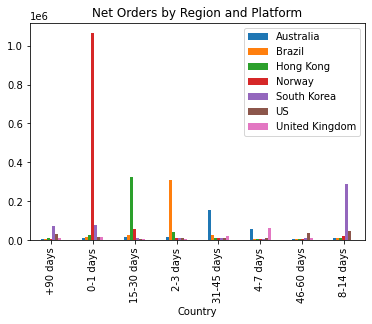

In [ ]:
entries_by_platform=df.groupby(["booking_window_group","country_name"],as_index=False).agg(orders = ('net_orders', 'sum'))

orders_by_region = []

for i in range(7,len(entries_by_platform),8):
    orders_by_region.append([entries_by_platform.loc[i-7, "booking_window_group"],entries_by_platform.loc[i-6, 
              "orders"],entries_by_platform.loc[i-5, "orders"]
              ,entries_by_platform.loc[i-4, "orders"],entries_by_platform.loc[i-3, "orders"],
              entries_by_platform.loc[i-2, "orders"],entries_by_platform.loc[i-1, "orders"],
              entries_by_platform.loc[i, "orders"]])
    
print(entries_by_platform)
print(orders_by_region)    
df1=pd.DataFrame(orders_by_region, columns=['Country', 'Australia', 'Brazil', 'Hong Kong', 'Norway', 'South Korea', 'US', 'United Kingdom'])
print(entries_by_platform)
df1.plot(x='Country',
        kind='bar',
        stacked=False,
        title='Net Orders by Region and Platform')

In [ ]:
entries_by_platform=df.groupby(["property_country", "country_name"],as_index=False).agg(orders = ('net_orders', 'sum'))

orders_by_region = []

for i in range(7,len(entries_by_platform),8):
    orders_by_region.append([entries_by_platform.loc[i-7, "property_country"],entries_by_platform.loc[i-6, 
              "orders"],entries_by_platform.loc[i-5, "orders"]
              ,entries_by_platform.loc[i-4, "orders"],entries_by_platform.loc[i-3, "orders"],
              entries_by_platform.loc[i-2, "orders"],entries_by_platform.loc[i-1, "orders"],
              entries_by_platform.loc[i, "orders"]])
    
print(entries_by_platform)
print(orders_by_region)    


     property_country    country_name  orders
0             Albania       Australia       1
1             Albania          Norway       2
2             Albania     South Korea       0
3             Albania              US      28
4             Albania  United Kingdom      19
...               ...             ...     ...
1123         Zimbabwe       Hong Kong       3
1124         Zimbabwe          Norway       3
1125         Zimbabwe     South Korea      13
1126         Zimbabwe              US      95
1127         Zimbabwe  United Kingdom      76

[1128 rows x 3 columns]
[['Albania', 2, 0, 28, 19, 2, 1, -1], ['Algeria', 9, 25, 34, 15, 1, 10, 1], ['Andorra', 2, 20, 39, 1, 1, 2, 1], ['Angola', 3, 32, 3, 2, 1, 1, 7], ['Antigua and Barbuda', 73, 131, 1692, 49, 118, 73, 2331], ['Argentina', 2, 1, 3, 2, 35, 5, 2], ['Aruba', 13, 605, 7, 53220, 267, 2516, 606], ['Australia', 6767, 3646, 206, 239, 184, 394, 996], ['Austria', 1462, 0, 1, -1, 8, 6, 18], ['Azerbaijan', 7, 38, 2, 17, 2, 916, 50], ['